In [1]:
import numpy as np               # linear algebra
import pandas as pd              # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns            #Statistical Data Visualization
import warnings
from IPython.display import Image, display

%pylab inline

import os

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.reset_option('max_columns')
#pd.reset_option('max_rows')

Populating the interactive namespace from numpy and matplotlib


In [13]:
donnees = pd.read_csv('Mall_Customers.xls', index_col='CustomerID')
donnees['homme'] = donnees.Gender.apply(lambda x : 1 if x=='Male' else 0)
donnees['femme'] = donnees.Gender.apply(lambda x : 0 if x=='Male' else 1)
donnees.drop(columns='Gender',inplace=True)
donnees.head()

,Age,Annual Income (k$),Spending Score (1-100),homme,femme
CustomerID,,,,,
1,19,15,39,1,0
2,21,15,81,1,0
3,20,16,6,0,1
4,23,16,77,0,1
5,31,17,40,0,1


# Classification ascendante hiérarchique

In [17]:
import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)
def afficheDendrogram(*args, **kwargs):
    font1 = fm.FontProperties(size=20)
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Classification Hiérarchique Ascendante', 
                  fontproperties=font2)
        plt.xlabel("index de l'échantillon ou (taille du cluster)", fontproperties=font1)
        plt.ylabel('distance', fontproperties=font1)
        plt.xticks(fontproperties=font1)
        plt.yticks(fontproperties=font1)
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center', fontproperties=font1)
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(donnees, method='ward')

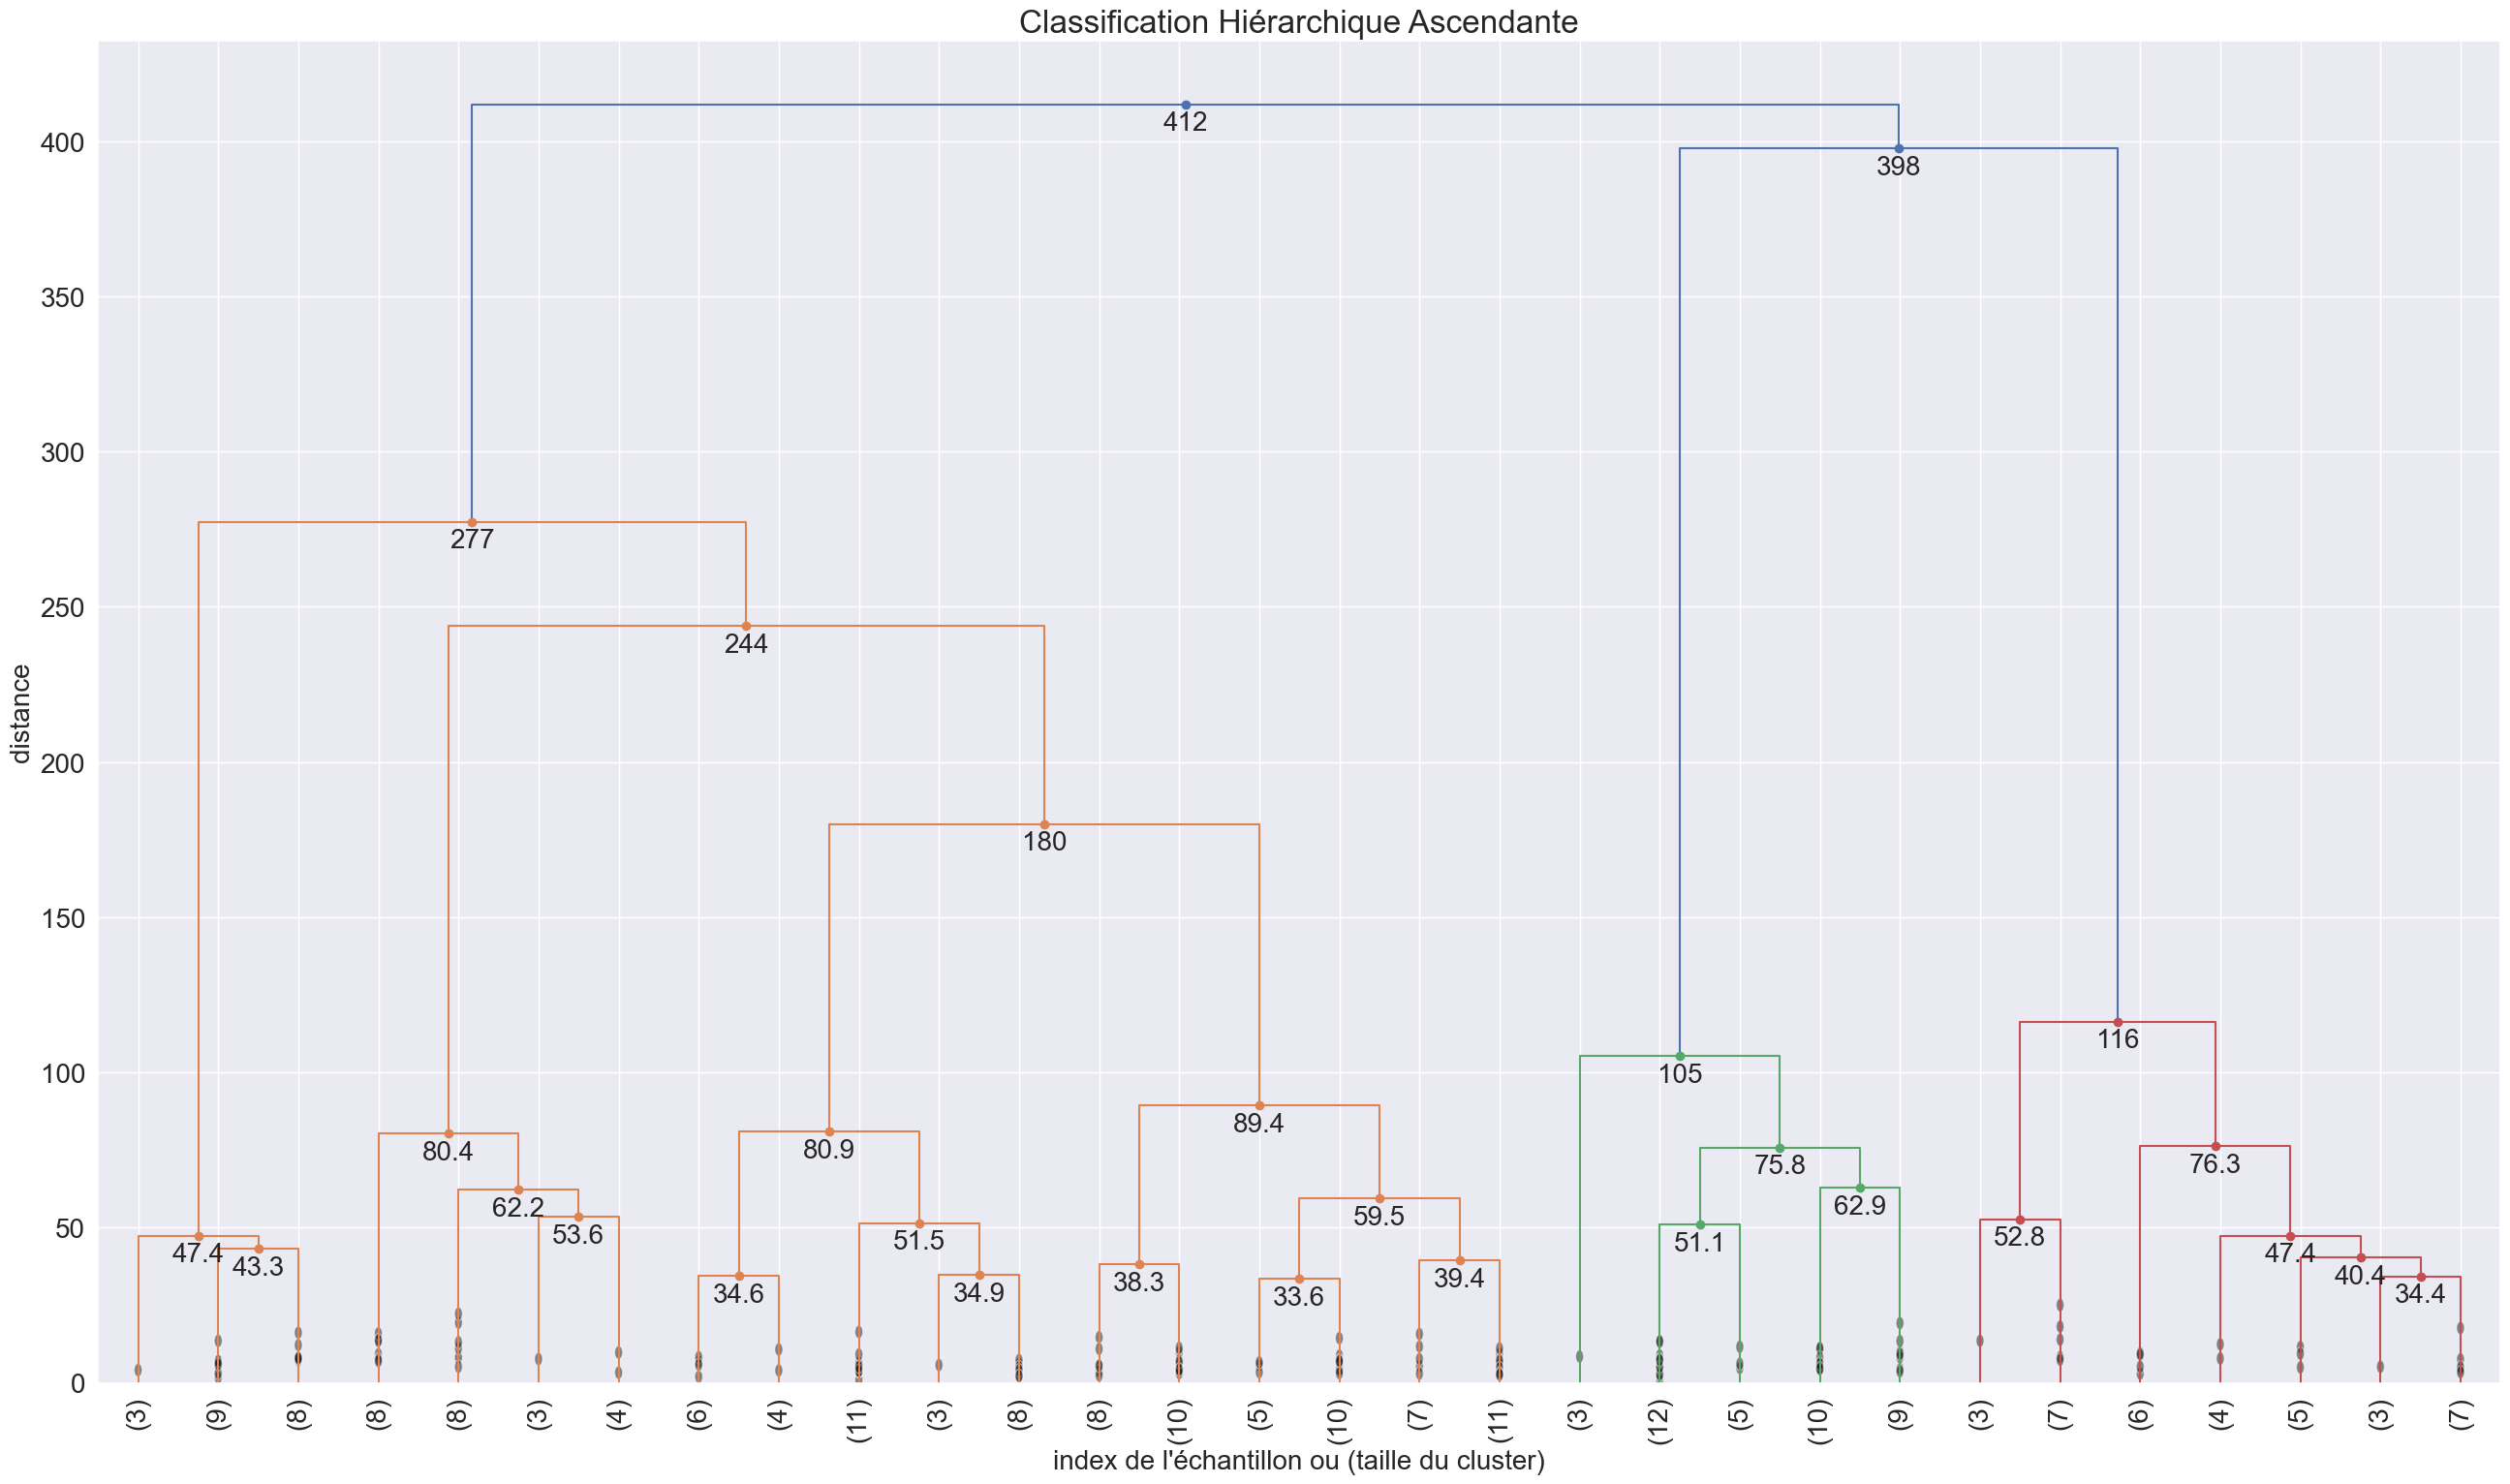

In [19]:
plt.figure(figsize=(32, 18))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
#     p=150,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=3,  # useful in small plots so annotations don't overlap
#     max_d = 180,
)
plt.show()

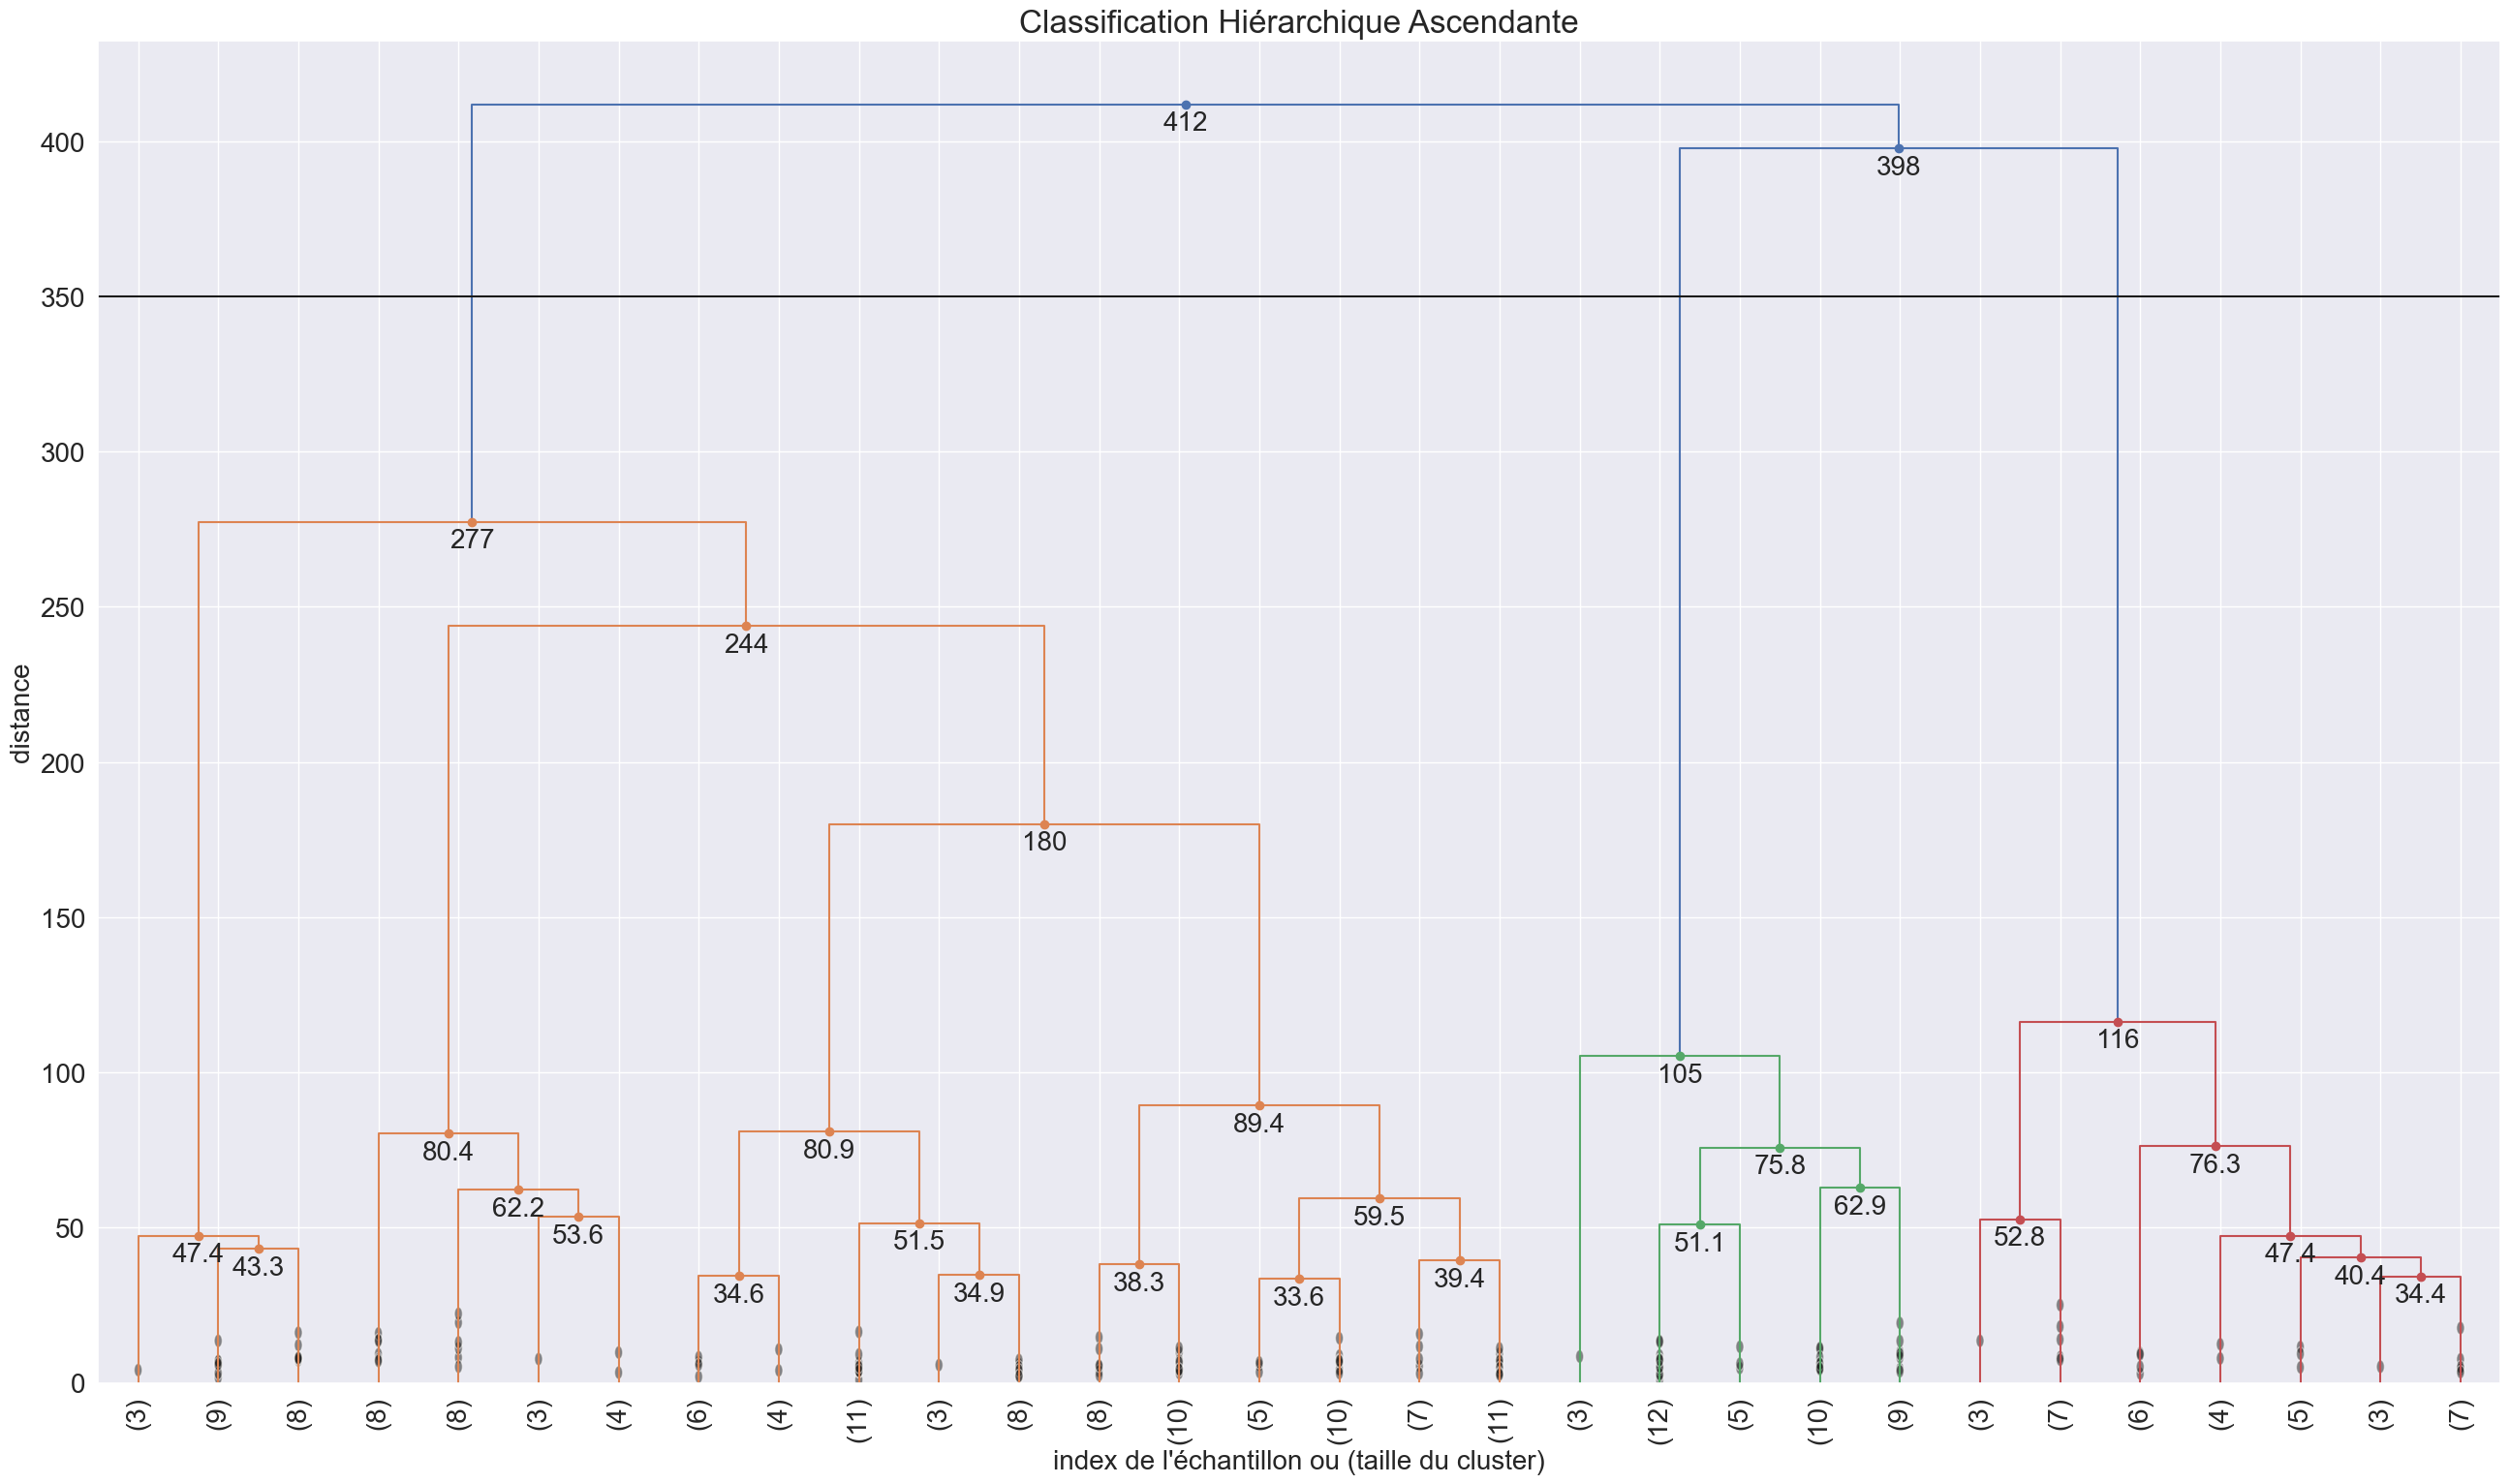

In [20]:
plt.figure(figsize=(32, 18))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
#     p=150,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=3,  # useful in small plots so annotations don't overlap
    max_d = 350,
)
plt.show()

# Le variables 

In [21]:
donnees.describe()

,Age,Annual Income (k$),Spending Score (1-100),homme,femme
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000,0.560000
std,13.969007,26.264721,25.823522,0.497633,0.497633
min,18.000000,15.000000,1.000000,0.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000,0.000000
50%,36.000000,61.500000,50.000000,0.000000,1.000000
75%,49.000000,78.000000,73.000000,1.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000,1.000000


## Les variables Quantitatives et Qualitatives 

In [22]:
Quantitatives = list()
Qualitatives  = list()
for nom in donnees.columns:
    print(f'{nom:20s}\t--\t{donnees[nom].unique().size}')
    if donnees[nom].unique().size > 10 : 
        Quantitatives.append(nom) 
    else :
        Qualitatives.append(nom)        

Age                 	--	51
Annual Income (k$)  	--	64
Spending Score (1-100)	--	84
homme               	--	2
femme               	--	2


## Les valeurs des variables 
### Qualitatives

In [23]:
for i, nom in enumerate(Qualitatives):
    print(i+1, nom, donnees[nom].unique().tolist()[:5])

1 homme [1, 0]
2 femme [0, 1]


### Quantitatives

In [24]:
for nom in Quantitatives:
    print(nom, donnees[nom].unique().tolist()[:5])

Age [19, 21, 20, 23, 31]
Annual Income (k$) [15, 16, 17, 18, 19]
Spending Score (1-100) [39, 81, 6, 77, 40]


# Transformation des données

In [25]:
donneesT = donnees.copy()

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(donneesT[Quantitatives])
donneesT[Quantitatives] = scaler.transform(donneesT[Quantitatives])

In [27]:
donneesT.head()

,Age,Annual Income (k$),Spending Score (1-100),homme,femme
CustomerID,,,,,
1,-1.424569,-1.738999,-0.434801,1,0
2,-1.281035,-1.738999,1.195704,1,0
3,-1.352802,-1.700830,-1.715913,0,1
4,-1.137502,-1.700830,1.040418,0,1
5,-0.563369,-1.662660,-0.395980,0,1


In [28]:
donneesT.shape

(200, 5)

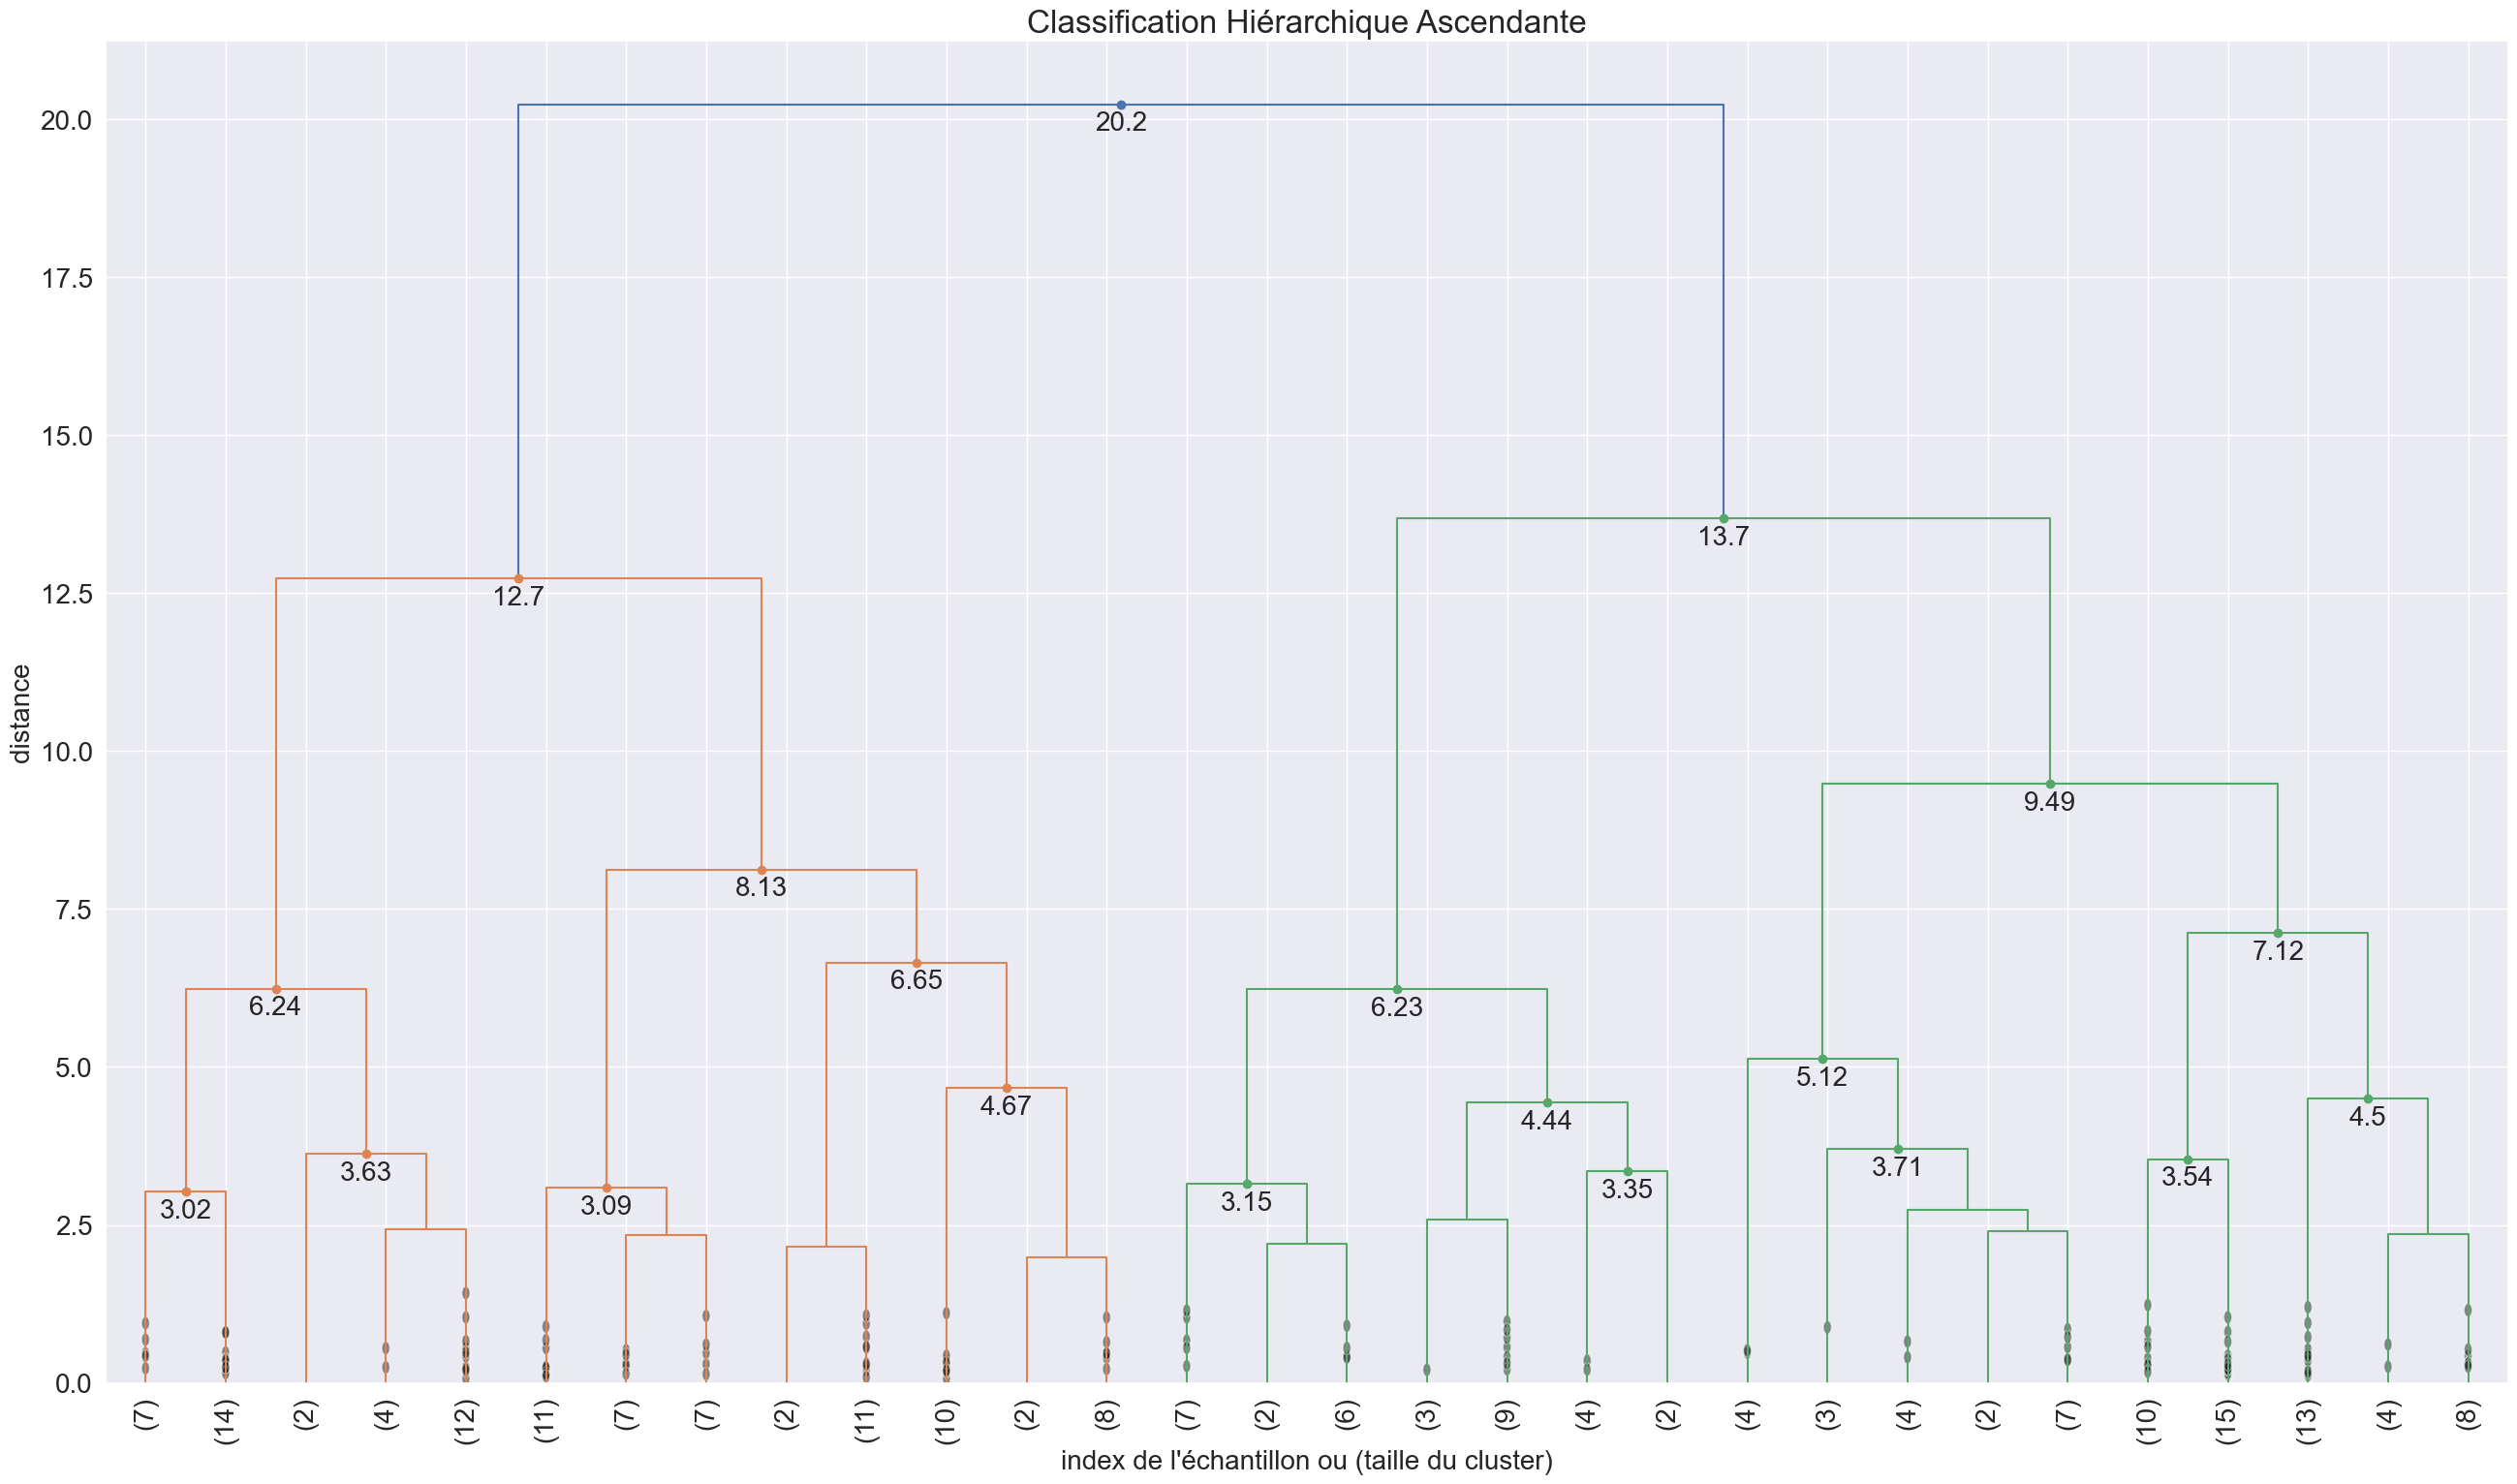

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(donneesT, method='ward')
plt.figure(figsize=(32, 18))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
#     p=150,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=3,
#     max_d = 70,
)
plt.show()

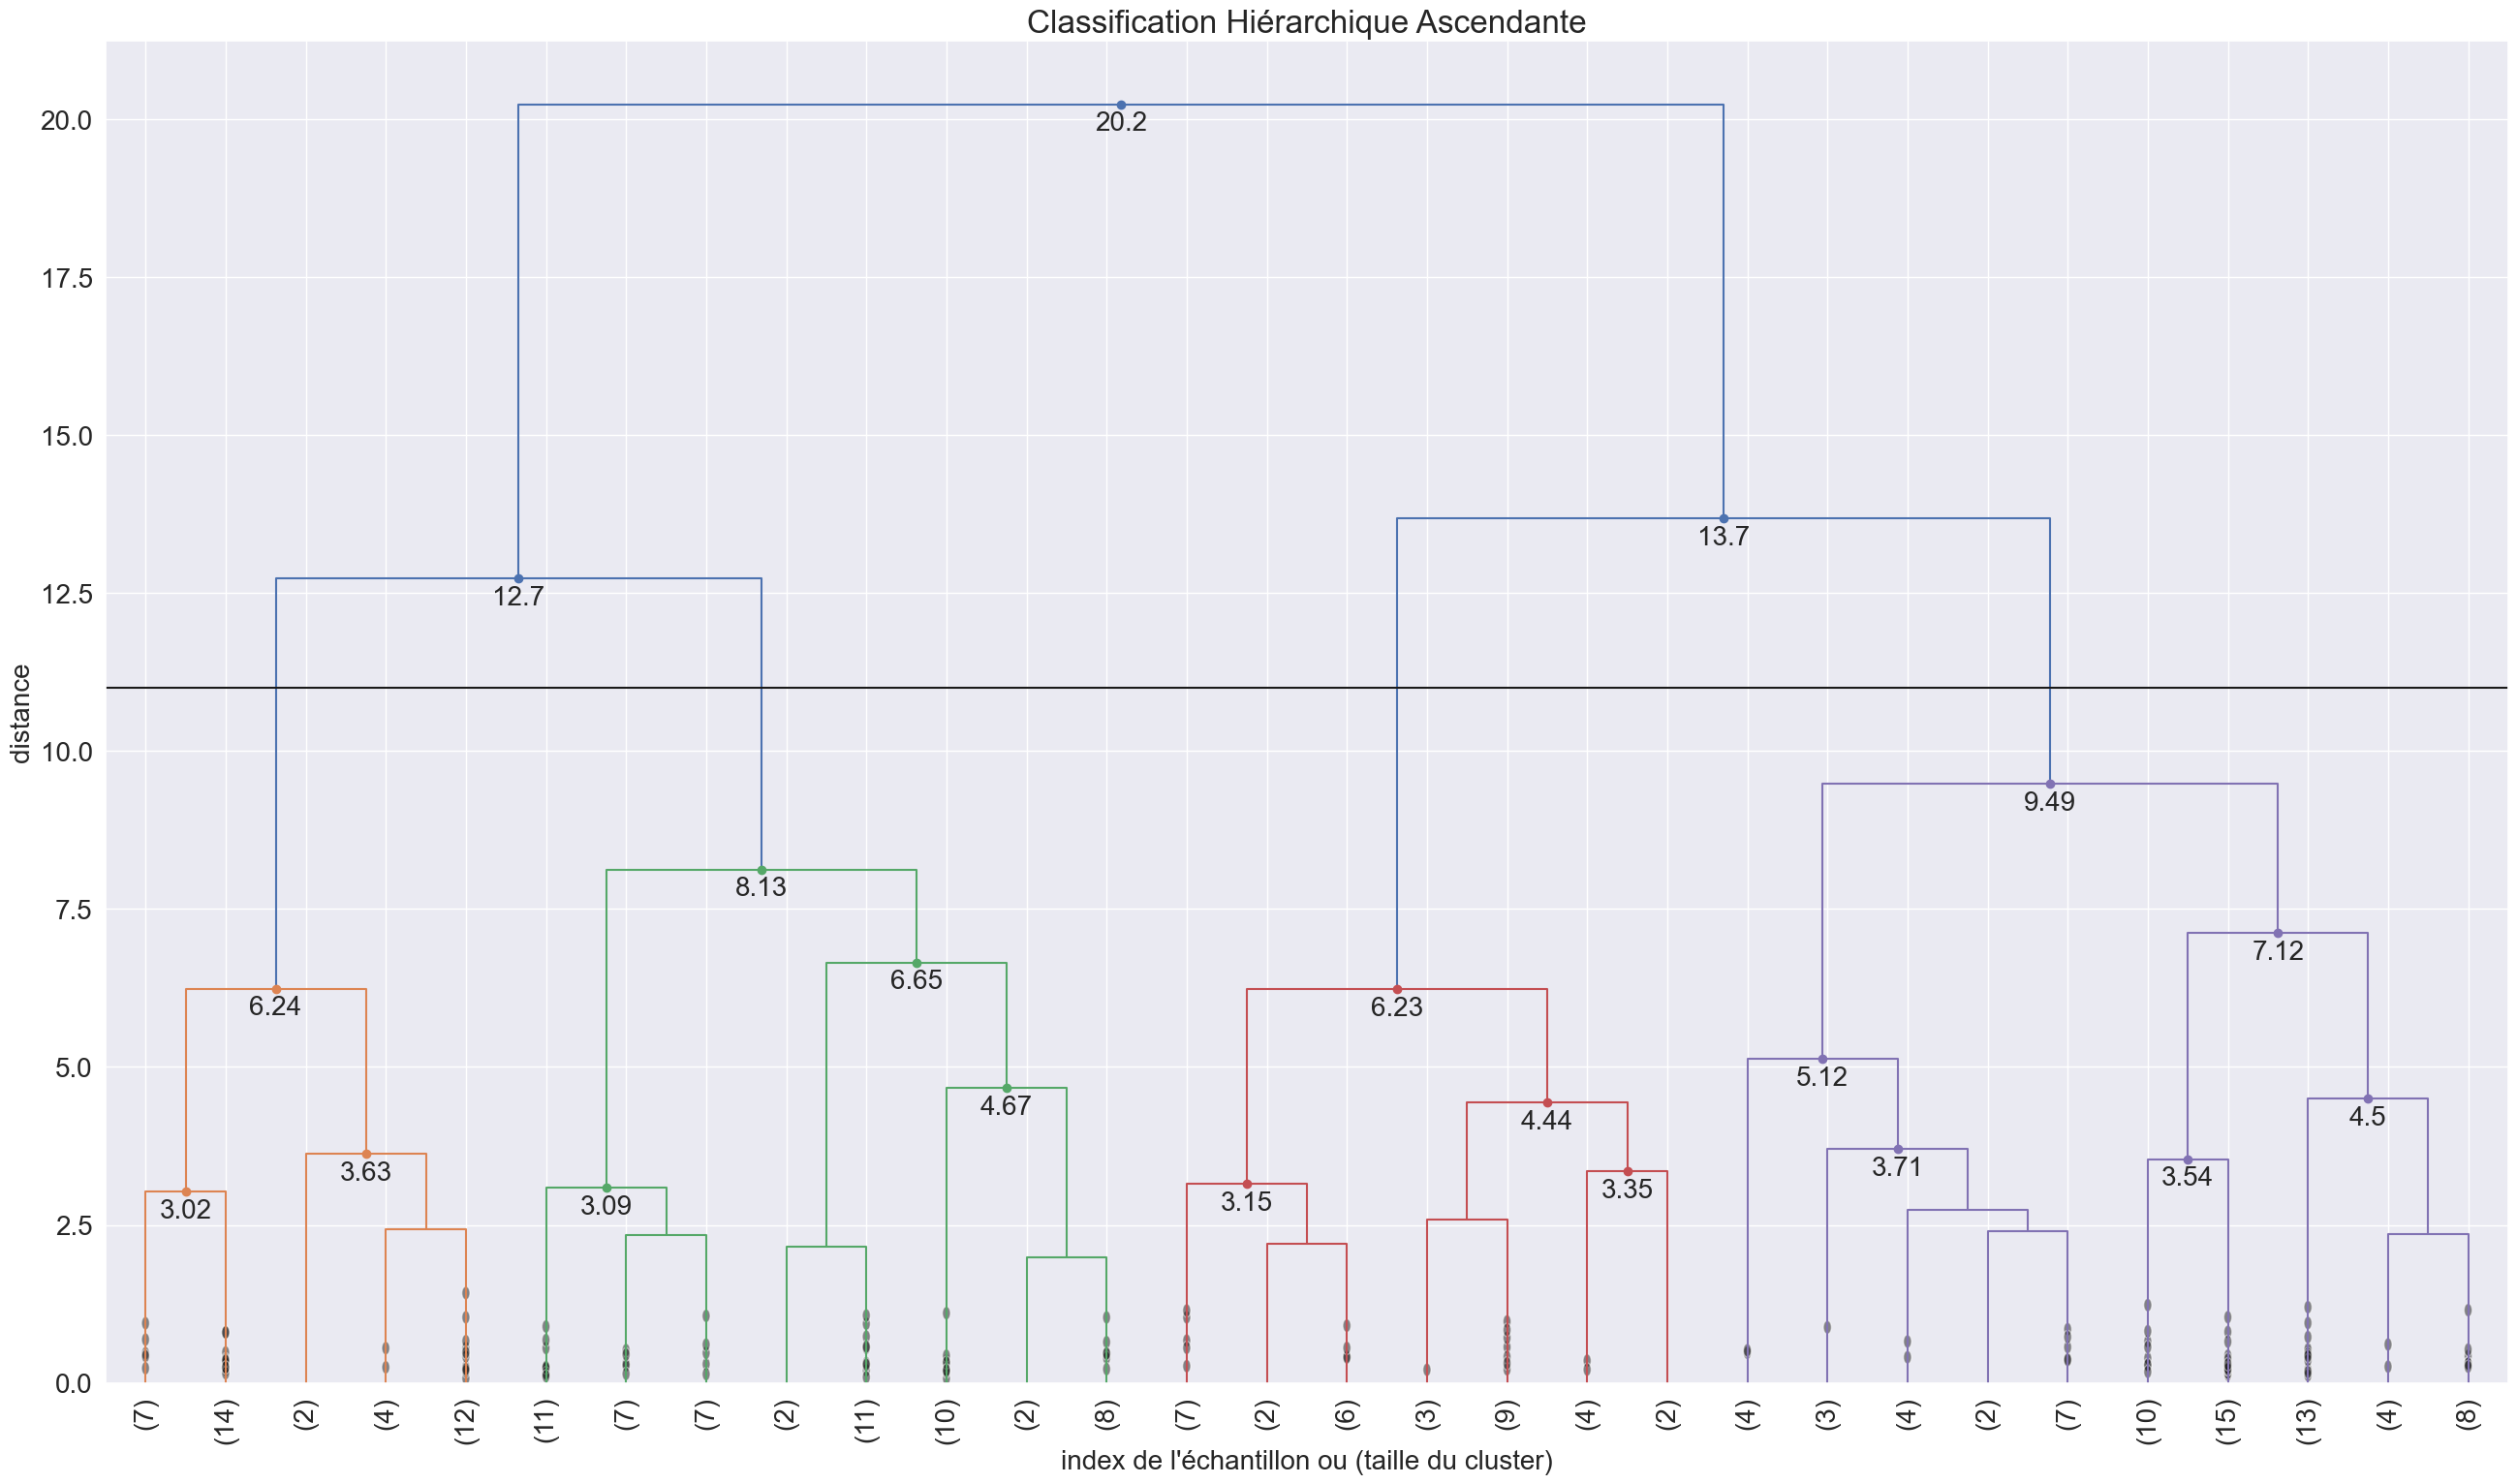

In [30]:
plt.figure(figsize=(32, 18))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
#     p=150,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=3,
    max_d = 11,
)
plt.show()

In [31]:
from scipy.cluster.hierarchy import fcluster
donneesT['Segments']=fcluster(Z, t=11, criterion='distance')

In [32]:
donneesT.head()

,Age,Annual Income (k$),Spending Score (1-100),homme,femme,Segments
CustomerID,,,,,,
1,-1.424569,-1.738999,-0.434801,1,0,4
2,-1.281035,-1.738999,1.195704,1,0,2
3,-1.352802,-1.700830,-1.715913,0,1,4
4,-1.137502,-1.700830,1.040418,0,1,2
5,-0.563369,-1.662660,-0.395980,0,1,4


# Analyse

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [39]:
X_train, X_test, y_train, y_test = train_test_split(donneesT.drop(columns='Segments'), 
                                                    donneesT.Segments, 
                                                    test_size=0.40, 
                                                    random_state = 5,
                                                    stratify= donneesT.Segments, 
                                               )

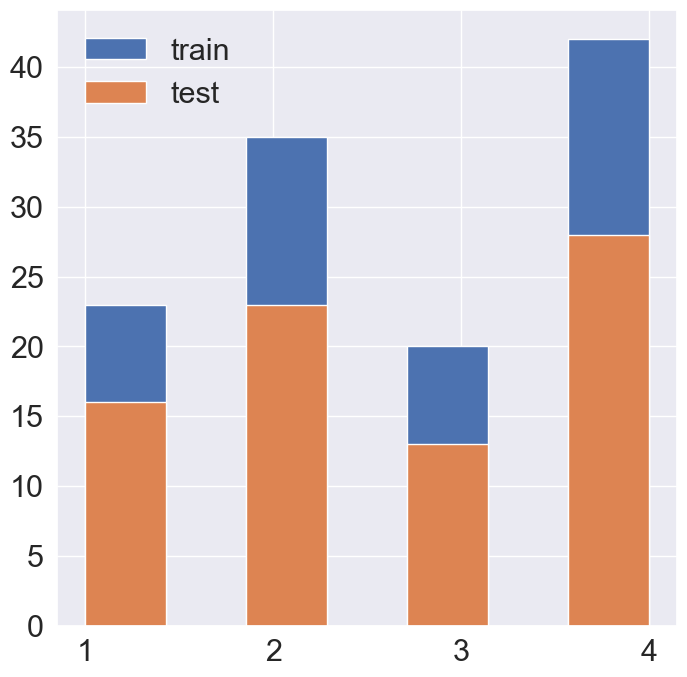

In [40]:
y_train.hist(bins=7, figsize=(8,8), label='train');
y_test.hist(bins=7, figsize=(8,8), label='test');
plt.legend();

In [41]:
# Using Grid Search to find the best parameters
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto'],
    'max_depth' : [None,3,5,8],
    'criterion' :['gini'],
    'min_samples_split':[2,3,4]
}

# Entraînement dy modèles RF Training RF Models with K-Fold of 5 
rf_models = GridSearchCV(RandomForestClassifier(random_state = 5), param_grid=param_grid, cv=5, verbose=1)
rf_models.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   21.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=5,
                                   

In [42]:
# Get the predictions
predictions = rf_models.predict(X_test)

# Print the Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(predictions, y_test))

Accuracy: 0.9125


In [43]:
# Print Feature Importance
feature_importance = pd.DataFrame(data={"Variables":X_test.columns, "importance %":rf_models.best_estimator_.feature_importances_*100})
feature_importance.sort_values("importance %", ascending=False).style.background_gradient(cmap='coolwarm', low=1, high=0)

,Variables,importance %
0,Age,34.919293
2,Spending Score (1-100),32.320709
1,Annual Income (k$),30.084898
3,homme,1.562428
4,femme,1.112672


In [44]:
donneesT.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'homme', 'femme',
       'Segments'],
      dtype='object')

In [51]:
import plotly.express as px
fig = px.scatter_3d(donneesT, 
                    x='Age', 
                    y='Annual Income (k$)', 
                    z='Spending Score (1-100)',
                    color='Segments',
                    symbol='femme',
                    width=900,
                    height=1024,
                   )

fig.show()